In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import time

df = pd.read_csv('data.csv', sep='~', encoding = 'utf-8', usecols=['ContingentUnitCourse', 'ContingentUnitName', 'DivisionsString', 'DivisionName','Start', 'End', 'EducatorAssignment', 'LocationsDisplayText', 'Subject'])
df.columns = ['Start', 'End', 'Курс', 'Номер группы', 'Факультет1', 'Факультет2', 'Преподаватель', 'Адрес', 'Предмет']
df['Вид занятия']=df['Предмет'].str.split(',').str.get(1)
df['Предмет']=df['Предмет'].str.split(',').str.get(0)
df['День'] = df['Start'].str.split(' ').str.get(0)
df['Время начала'] = df['Start'].str.split(' ').str.get(1)
df['Время окончания'] = df['End'].str.split(' ').str.get(1)
df['Факультет'] = df['Факультет1'].fillna(df['Факультет2'])



def convert(x):
    x = x.tm_wday
    if x == 0:
        return 'пн'
    elif x == 1:
        return 'вт'
    elif x == 2:
        return 'ср'
    elif x == 3:
        return 'чт'
    elif x == 4:
        return 'пт'
    elif x == 5:
        return 'сб'
df['День недели'] = (df['День'].apply(time.strptime, args = ('%Y-%m-%d',))).apply(convert)
df['Day'] = df['День'].apply(time.strptime, args = ('%Y-%m-%d',))

def weekNumber(x):
    return time.strftime("%W", time.strptime(x, "%Y-%m-%d"))    
df['Номер недели'] = df['День'].apply(weekNumber)
df = df[['Номер группы', 'Факультет', 'Курс', 'Преподаватель', 'Адрес', 'Предмет', 'Вид занятия', 'День', 'День недели', 'Номер недели', 'Время начала', 'Время окончания']]

In [3]:
df.head(10)

,Номер группы,Факультет,Курс,Преподаватель,Адрес,Предмет,Вид занятия,День,День недели,Номер недели,Время начала,Время окончания
0,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-01,сб,35,15:25:00.000,17:00:00.000
1,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-08,сб,36,15:25:00.000,17:00:00.000
2,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-15,сб,37,15:25:00.000,17:00:00.000
3,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-22,сб,38,15:25:00.000,17:00:00.000
4,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-29,сб,39,15:25:00.000,17:00:00.000
5,1 поток 18/5031/1 Лекции,Юридический факультет,1 Курс,0B908BF3-99DB-41D4-978D-656D36F81007,"В.О., Большой пр., д. 71, лит. А, 13 зал",Теория права и государства,лекция,2018-09-05,ср,36,12:10:00.000,13:50:00.000
6,1 поток 18/5031/1 Лекции,Юридический факультет,1 Курс,0B908BF3-99DB-41D4-978D-656D36F81007,"В.О., Большой пр., д. 71, лит. А, 13 зал",Теория права и государства,лекция,2018-09-12,ср,37,12:10:00.000,13:50:00.000
7,1 поток 18/5031/1 Лекции,Юридический факультет,1 Курс,0B908BF3-99DB-41D4-978D-656D36F81007,"В.О., Большой пр., д. 71, лит. А, 13 зал",Теория права и государства,лекция,2018-09-19,ср,38,12:10:00.000,13:50:00.000
8,1 поток 18/5031/1 Лекции,Юридический факультет,1 Курс,0B908BF3-99DB-41D4-978D-656D36F81007,"В.О., Большой пр., д. 71, лит. А, 13 зал",Теория права и государства,лекция,2018-09-26,ср,39,12:10:00.000,13:50:00.000
9,15.Б01-с,Факультет социологии,4 Курс,63B715FB-C087-4077-92E9-0C7A180922E1,"ул. Смольного, д. 1/3, корп. подъезд 9, 108",Социологический практикум,практическое занятие,2018-09-12,ср,37,17:00:00.000,18:30:00.000


# Список преподавателей, обучающих выбранную группу/ведущих выбранную дисциплину

In [37]:
# Ввод данных
faculty1 = input()
number1 = input()

Юридический факультет
1 поток 18/5031/1 Лекции


In [38]:
# Первый пункт
print(pd.unique(df[(df['Номер группы'] == number1) & (df['Факультет'] == faculty1)]['Преподаватель']))

['0B908BF3-99DB-41D4-978D-656D36F81007'
 '64DE9038-77FE-4F76-A05F-D25E831B942F'
 'CB857272-D1C3-4073-9BDB-048980E3390A'
 'CEBFEEC7-688D-458B-B324-EF623E1E265E'
 '4E5AB85B-FC69-4558-9573-F544DF939AF5'
 '8BD5EB63-E6C6-4ACB-9423-48809A71840B'
 'C8B43F78-46A3-4D3E-A224-A53AF8A15B7B'
 '6E84B64E-5686-4882-9617-ED8BCAC6BB75'
 'FB71DE40-7294-49EA-A1A8-99F3EAD00F40']


In [39]:
# Ввод данных
faculty2 = input()
lesson2 = input()

Математико-механический факультет
Алгебра


In [40]:
# Второй пункт
print(pd.unique(df[(df['Предмет'] == lesson2) & (df['Факультет'] == faculty2)]['Преподаватель']))

['9E8499C6-5634-4B51-8585-718B22804A64'
 '27D29DE0-7285-41B9-9967-C51E0FA4F027'
 '570E0227-246F-4389-B948-570917FCD5A7'
 '232070CC-A657-4C14-B52E-F8DA86366C6A'
 '31620C98-4A38-4406-95E6-76BAB9B43328'
 '29FEE08E-DDEA-4EC0-A855-09EAC0CB9634'
 'F2BD7EDD-3513-4989-870D-E8516E148574'
 '8E33A4E5-406B-48DE-9B47-693D1932E527'
 'FBC21B59-0D38-4D38-9536-8F7AC65F72F1'
 '4BF14F17-27D2-4A37-A55B-F5E6E58B5E42'
 '7265C590-2C76-4CE3-96E6-C05ECCFECC35'
 'A9D699C1-FD87-4F0A-8912-95CB0A3AF8A6'
 '4DD819C7-0B3C-4DA5-9E16-78B0805D4AAE'
 '3E38CA8F-60E8-413A-87A3-6456011BD148'
 '9FFC42D5-4E84-444B-9FD9-96E95FD8579C'
 'CE37B10B-F261-4709-8998-5FDB759B99EF']


# Занятость преподавателей, обучающих выбранную группу/ведущих выбранную дисциплину

In [41]:
# Ввод данных
faculty3 = input()
number3 = input()

Юридический факультет
1 поток 18/5031/1 Лекции


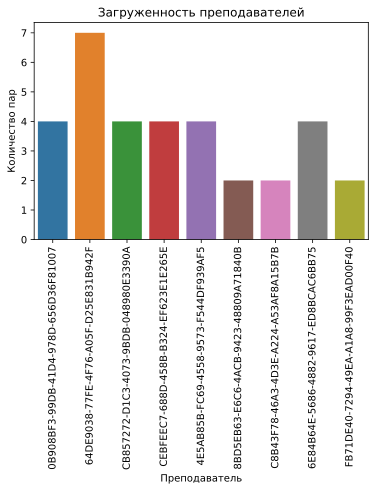

In [45]:
# Первый пункт
sns.countplot(df[(df['Факультет'] == faculty3) & (df['Номер группы'] == number3)]['Преподаватель']);
plt.ylabel('Количество пар');
plt.title('Загруженность преподавателей');
plt.xticks(rotation=90);

In [46]:
# Ввод данных
faculty4 = input()
lesson4 = input()

Математико-механический факультет
Алгебра


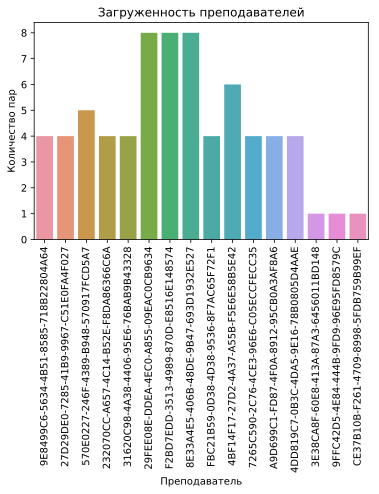

In [47]:
# Второй пункт
sns.countplot(df[(df['Факультет'] == faculty4) & (df['Предмет'] == lesson4)]['Преподаватель']);
plt.ylabel('Количество пар');
plt.title('Загруженность преподавателей');
plt.xticks(rotation=90);

# Занятость определенных преподавателей

In [48]:
# Ввод данных
faculty5 = input()
teacherName5 = input()
day5 = input()

Математико-механический факультет
DB47ACD1-8A86-4382-9F59-971AA37EA375
2018-09-15


In [49]:
# Просто список пар преподавателя
df[(df['Преподаватель'] == teacherName5) & (df['Факультет'] == faculty5)].head(10)

,Номер группы,Факультет,Курс,Преподаватель,Адрес,Предмет,Вид занятия,День,День недели,Номер недели,Время начала,Время окончания
0,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-01,сб,35,15:25:00.000,17:00:00.000
1,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-08,сб,36,15:25:00.000,17:00:00.000
2,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-15,сб,37,15:25:00.000,17:00:00.000
3,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-22,сб,38,15:25:00.000,17:00:00.000
4,18.Б03-мм,Математико-механический факультет,1 Курс,DB47ACD1-8A86-4382-9F59-971AA37EA375,"В.О., 14 линия, д. 29, 102",Основы наивной теории множеств,практическое занятие,2018-09-29,сб,39,15:25:00.000,17:00:00.000


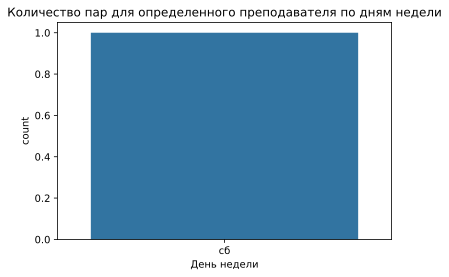

In [51]:
# График занятости преподавателя на конкретной неделе
week5 = time.strftime("%W", time.strptime(day5, "%Y-%m-%d"))
sns.countplot(df[(df['Преподаватель'] == teacherName5) & (df['Факультет'] == faculty5) & (df['Номер недели'] == week5)]['День недели']);
plt.title('Количество пар для определенного преподавателя по дням недели');